In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
# import rasterio as rio
import matplotlib.pyplot as plt

In [2]:
# import os
g = os.getcwd()
g
path = r'D:\repos\GEO_CLARO'
os.chdir(path)

In [3]:
pnt = gpd.read_file('data/points_ok/late_bgt.shp')
pnt['FECHA'] = pd.to_datetime(pnt['FECHA'])
pnt["N_OPERADOR"] = pnt["N_OPERADOR"].astype(int)
pnt.head(10)

,FECHA,TEST_ID,N_OPERADOR,DOWNLOAD_M,UPLOAD_MBP,CLASS_LATE,localidad,geometry
0,2021-01-28,6978771403,4,10.410156,0.640625,0,ANTONIO NARIÑO,POINT (-74.09600 4.58700)
1,2021-01-19,6945885369,4,10.294922,4.988281,0,ANTONIO NARIÑO,POINT (-74.12100 4.59200)
2,2021-01-08,6907797685,4,28.707031,4.711914,0,ANTONIO NARIÑO,POINT (-74.10000 4.59000)
3,2021-01-21,6953823661,4,53.502930,7.201172,0,ANTONIO NARIÑO,POINT (-74.09500 4.58500)
4,2021-01-21,6952553476,4,26.608398,6.316406,0,ANTONIO NARIÑO,POINT (-74.12100 4.59300)
5,2021-01-21,6954103035,4,5.515625,4.158203,0,ANTONIO NARIÑO,POINT (-74.10300 4.59000)
6,2021-01-23,6961155289,4,48.430664,6.875977,0,ANTONIO NARIÑO,POINT (-74.10400 4.59100)
7,2021-01-23,6960257415,4,3.519531,2.939453,0,ANTONIO NARIÑO,POINT (-74.10600 4.59200)
8,2021-01-25,6966330006,4,0.201172,1.002930,0,ANTONIO NARIÑO,POINT (-74.09400 4.58600)
9,2021-01-25,6967943641,4,7.100586,4.663086,0,ANTONIO NARIÑO,POINT (-74.08900 4.58900)


In [4]:
pnt.drop(columns=['TEST_ID','DOWNLOAD_M','UPLOAD_MBP','CLASS_LATE','localidad'], inplace=True)
pnt.head(10)

,FECHA,N_OPERADOR,geometry
0,2021-01-28,4,POINT (-74.09600 4.58700)
1,2021-01-19,4,POINT (-74.12100 4.59200)
2,2021-01-08,4,POINT (-74.10000 4.59000)
3,2021-01-21,4,POINT (-74.09500 4.58500)
4,2021-01-21,4,POINT (-74.12100 4.59300)
5,2021-01-21,4,POINT (-74.10300 4.59000)
6,2021-01-23,4,POINT (-74.10400 4.59100)
7,2021-01-23,4,POINT (-74.10600 4.59200)
8,2021-01-25,4,POINT (-74.09400 4.58600)
9,2021-01-25,4,POINT (-74.08900 4.58900)


In [5]:
pnt['LON']=pd.Series(pnt['geometry'].apply(lambda p: p.x))
pnt['LAT']=pd.Series(pnt['geometry'].apply(lambda p: p.y))
pnt.head(10)

,FECHA,N_OPERADOR,geometry,LON,LAT
0,2021-01-28,4,POINT (-74.09600 4.58700),-74.096,4.587
1,2021-01-19,4,POINT (-74.12100 4.59200),-74.121,4.592
2,2021-01-08,4,POINT (-74.10000 4.59000),-74.100,4.590
3,2021-01-21,4,POINT (-74.09500 4.58500),-74.095,4.585
4,2021-01-21,4,POINT (-74.12100 4.59300),-74.121,4.593
5,2021-01-21,4,POINT (-74.10300 4.59000),-74.103,4.590
6,2021-01-23,4,POINT (-74.10400 4.59100),-74.104,4.591
7,2021-01-23,4,POINT (-74.10600 4.59200),-74.106,4.592
8,2021-01-25,4,POINT (-74.09400 4.58600),-74.094,4.586
9,2021-01-25,4,POINT (-74.08900 4.58900),-74.089,4.589


In [6]:
# pnt.drop(columns='geometry', inplace=True)
pnt = pnt[pnt['FECHA']>='2021-04-01']
pnt_copy = pnt.copy()

In [7]:
pnt_copy.head(5)


,FECHA,N_OPERADOR,geometry,LON,LAT
5552,2021-04-01,1,POINT (-74.11400 4.59500),-74.114,4.595
5554,2021-04-07,1,POINT (-74.09700 4.58100),-74.097,4.581
5555,2021-04-13,1,POINT (-74.10300 4.59000),-74.103,4.590
5556,2021-04-15,1,POINT (-74.08900 4.58600),-74.089,4.586
5557,2021-04-17,1,POINT (-74.09400 4.57900),-74.094,4.579


In [8]:

pnt_copy.drop(columns='geometry',inplace=True)
train_dataset = pnt_copy[pnt_copy['FECHA']<='2021-08-30']
val_dataset = pnt_copy[pnt_copy['FECHA']>'2021-08-30']
train_dataset.head(5)

,FECHA,N_OPERADOR,LON,LAT
5552,2021-04-01,1,-74.114,4.595
5554,2021-04-07,1,-74.097,4.581
5555,2021-04-13,1,-74.103,4.590
5556,2021-04-15,1,-74.089,4.586
5557,2021-04-17,1,-74.094,4.579


In [9]:
X = train_dataset.drop(columns=['N_OPERADOR'])
y = train_dataset['N_OPERADOR']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
encoder = preprocessing.OneHotEncoder()
X[['LON','LAT']]= scaler.fit_transform(X[['LON','LAT']])
X = pd.get_dummies(X, columns=['FECHA'], drop_first=True, prefix='FECHA')

In [10]:
X_test = X[X['FECHA_2021-08-30 00:00:00']==1]
X_test



,LON,LAT,FECHA_2021-04-02 00:00:00,FECHA_2021-04-03 00:00:00,FECHA_2021-04-04 00:00:00,FECHA_2021-04-05 00:00:00,FECHA_2021-04-06 00:00:00,FECHA_2021-04-07 00:00:00,FECHA_2021-04-08 00:00:00,FECHA_2021-04-09 00:00:00,...,FECHA_2021-08-21 00:00:00,FECHA_2021-08-22 00:00:00,FECHA_2021-08-23 00:00:00,FECHA_2021-08-24 00:00:00,FECHA_2021-08-25 00:00:00,FECHA_2021-08-26 00:00:00,FECHA_2021-08-27 00:00:00,FECHA_2021-08-28 00:00:00,FECHA_2021-08-29 00:00:00,FECHA_2021-08-30 00:00:00
11227,0.035410,-1.500904,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11304,-0.463239,-1.292033,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11308,-0.288712,-1.330010,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11319,-0.513104,-1.386975,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11447,0.085275,-1.519893,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741444,1.406693,1.195430,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4741567,1.406693,1.195430,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4741751,1.406693,1.195430,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4742001,1.406693,1.195430,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
y_test = y[X_test.index]
y_test.shape

(20079,)

In [15]:
# from sklearn.model_selection import cross_validate, KFold, GridSearchCV,cross_val_predict
from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

classi = RandomForestClassifier(n_estimators=200)
# # regr = RandomForestRegressor(random_state=0)

# # regr.fit(X, y)
classi.fit(X, y)

RandomForestClassifier(n_estimators=200)

In [17]:
from sklearn.metrics import accuracy_score, mean_squared_error#,mean_absolute_error,precision_score
y_predict = classi.predict(X_test)
print('Precisión del modelo: ', classi.score(X, y))
print("R2: ", accuracy_score(y_test, y_predict))
# print("precision: ", precision_score(y_test,y_predict))
print("MAE: ", mean_squared_error(y_test, y_predict))


Precisión del modelo:  0.7472947928498834
R2:  0.6678121420389461
MAE:  2.1244085860849644


In [14]:
y_test, y_predict

(11227      1
 11304      1
 11308      1
 11319      1
 11447      1
           ..
 4741444    4
 4741567    4
 4741751    4
 4742001    4
 4742021    4
 Name: N_OPERADOR, Length: 20079, dtype: int32,
 array([1, 1, 1, ..., 1, 1, 1]))

In [39]:
parameters = {'n_estimators': range(1, 1001, 20)}
scoring = {'AUC': 'roc_auc', "Accuracy":"accuracy", "F1":"f1"}

tuning = GridSearchCV(classi, parameters,scoring=scoring, cv=3, refit='AUC', return_train_score=True)


In [40]:
tuning.fit(X, y)

C:\Users\FrankHurtado\Miniconda3\envs\geods\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\FrankHurtado\Miniconda3\envs\geods\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\FrankHurtado\Miniconda3\envs\geods\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\Users\FrankHurtado\Miniconda3\envs\geods\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\FrankHurtado\Miniconda3\envs\geods\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The sc

KeyboardInterrupt: 

In [ ]:
results = tuning.cv_results_

AUC 1.0
Accuracy 1.0
F1 1.0


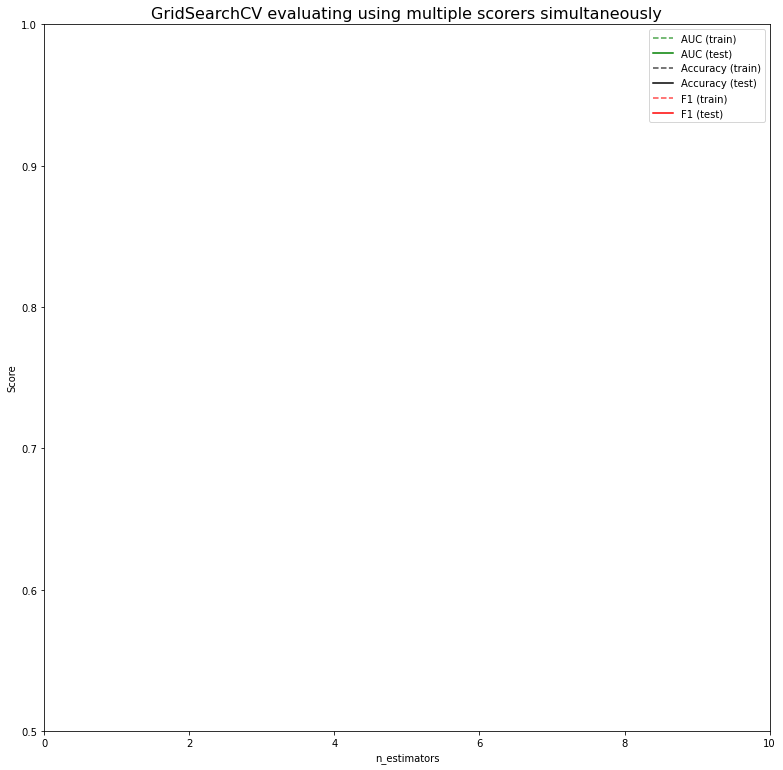

In [ ]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("n_estimators")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 10)
ax.set_ylim(0.5, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_n_estimators'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k', 'r']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)
    print(scorer, X_axis[best_index])

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [ ]:
results

{'mean_fit_time': array([31.55009675, 61.82875848, 53.40927943]),
 'std_fit_time': array([ 1.53357389,  1.60246669, 31.26818076]),
 'mean_score_time': array([0.02033146, 0.01566688, 0.00766667]),
 'std_score_time': array([0.00235522, 0.00047401, 0.00543649]),
 'param_n_estimators': masked_array(data=[1, 3, 5],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1}, {'n_estimators': 3}, {'n_estimators': 5}],
 'split0_test_AUC': array([nan, nan, nan]),
 'split1_test_AUC': array([nan, nan, nan]),
 'split2_test_AUC': array([nan, nan, nan]),
 'mean_test_AUC': array([nan, nan, nan]),
 'std_test_AUC': array([nan, nan, nan]),
 'rank_test_AUC': array([1, 2, 3]),
 'split0_train_AUC': array([nan, nan, nan]),
 'split1_train_AUC': array([nan, nan, nan]),
 'split2_train_AUC': array([nan, nan, nan]),
 'mean_train_AUC': array([nan, nan, nan]),
 'std_train_AUC': array([nan, nan, nan]),
 'split0_test_Accuracy': array([nan, nan, nan])